# Introducción a Modelos de Machine Learning

 Contenido

1. [Introducción al Machine Learning](#1-introducción-al-machine-learning)
2. [Tipos de Aprendizaje](#2-tipos-de-aprendizaje)
3. [Preparación de Datos](#3-preparación-de-datos)
4. [Modelos de Aprendizaje Supervisado](#4-modelos-de-aprendizaje-supervisado)
   - [Regresión Lineal](#41-regresión-lineal)
   - [Árboles de Decisión](#42-árboles-de-decisión)
   - [Random Forest](#43-random-forest)
5. [Evaluación de Modelos](#5-evaluación-de-modelos)
6. [Aprendizaje No Supervisado](#6-aprendizaje-no-supervisado)
   - [K-Means](#61-k-means)
7. [Redes Neuronales con GPU](#7-redes-neuronales-con-gpu)
8. [Resumen y Recursos Adicionales](#9-resumen-y-recursos-adicionales)

# 1. Introducción al Machine Learning

Machine Learning (ML) o Aprendizaje Automático es una rama de la Inteligencia Artificial que se centra en el desarrollo de algoritmos y modelos estadísticos que permiten a los sistemas "aprender" de los datos y realizar predicciones o tomar decisiones sin ser explícitamente programados para realizar tareas específicas.

En lugar de escribir código con reglas explícitas, en ML proporcionamos datos a los algoritmos y estos construyen su propia lógica basada en patrones identificados.

# ¿Por qué es importante el Machine Learning?

- **Automatización**: Permite automatizar tareas complejas que antes requerían intervención humana.
- **Escalabilidad**: Puede procesar y analizar volúmenes de datos mucho mayores que los que un humano podría manejar.
- **Precisión**: En muchas tareas, los modelos pueden alcanzar o superar la precisión humana.
- **Personalización**: Permite crear sistemas que se adaptan a preferencias individuales.

# Componentes clave del ML

1. **Datos**: La materia prima del ML. La calidad y cantidad de datos determinan en gran medida el éxito de un modelo.
2. **Algoritmos**: Los métodos matemáticos que "aprenden" de los datos.
3. **Características (features)**: Las variables o atributos utilizados para hacer predicciones.
4. **Modelos**: La representación matemática aprendida a partir de los datos.
5. **Métricas de evaluación**: Medidas para evaluar el rendimiento de un modelo.

Vamos a importar las bibliotecas que utilizaremos a lo largo de este notebook:

In [1]:
# Bibliotecas esenciales para datos y visualización
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Configuraciones

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")

Mensajes de configuración

In [3]:
import warnings
warnings.filterwarnings('ignore')

Para división de datos

In [4]:
%pip install sklearn
from sklearn.model_selection import train_test_split

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Para preprocesamiento

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Para métricas de evaluación

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [7]:
print("¡Bibliotecas importadas correctamente!")

¡Bibliotecas importadas correctamente!


# 2. Tipos de Aprendizaje

Existen diferentes enfoques de aprendizaje en Machine Learning, cada uno adecuado para distintos tipos de problemas:

# Aprendizaje Supervisado

- **Definición**: El algoritmo aprende a partir de datos etiquetados (con respuestas conocidas).
- **Objetivo**: Predecir etiquetas para nuevos datos no vistos.
- **Ejemplos**:
  - **Clasificación**: Predecir categorías (como spam/no spam, fraude/no fraude).
  - **Regresión**: Predecir valores numéricos continuos (como precio, temperatura).

# Aprendizaje No Supervisado

- **Definición**: El algoritmo aprende de datos no etiquetados, identificando patrones por sí mismo.
- **Objetivo**: Descubrir estructuras ocultas en los datos.
- **Ejemplos**:
  - **Clustering**: Agrupar datos similares (como segmentación de clientes).
  - **Reducción de dimensionalidad**: Simplificar datos complejos manteniendo sus características principales.
  - **Detección de anomalías**: Identificar datos inusuales o atípicos.

# Aprendizaje Por Refuerzo

- **Definición**: El algoritmo aprende a través de la interacción con un entorno, recibiendo recompensas o penalizaciones.
- **Objetivo**: Aprender políticas de acción que maximicen una recompensa acumulada.
- **Ejemplos**: Juegos, robótica, navegación autónoma.

En esta clase nos centraremos principalmente en los dos primeros tipos: aprendizaje supervisado y no supervisado.

# 3. Preparación de Datos

La preparación de datos es una fase crucial en cualquier proyecto de ML. Los datos limpios y bien estructurados son fundamentales para el éxito de los modelos.

Vamos a cargar un conjunto de datos para mostrar el proceso completo:

In [8]:
# Cargar el conjunto de datos de diabetes de scikit-learn
from sklearn.datasets import load_diabetes, load_breast_cancer

Cargamos datos para regresión

In [9]:
diabetes_dataset = load_diabetes()
X_diabetes = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.feature_names)
y_diabetes = diabetes_dataset.target

Cargamos datos para clasificación

In [10]:
cancer_dataset = load_breast_cancer()
X_cancer = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)
y_cancer = cancer_dataset.target

Exploremos los datos de diabetes

In [11]:
print("Conjunto de datos de diabetes (regresión):")
print(f"- Forma de X: {X_diabetes.shape}")
print(f"- Forma de y: {y_diabetes.shape}")
print("\nPrimeras 5 filas de X:")
print(X_diabetes.head())
print("\nDescripción estadística:")
print(X_diabetes.describe())

Conjunto de datos de diabetes (regresión):
- Forma de X: (442, 10)
- Forma de y: (442,)

Primeras 5 filas de X:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Descripción estadística:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -

Exploremos también los datos de cáncer

In [12]:
print("\n\nConjunto de datos de cáncer de mama (clasificación):")
print(f"- Forma de X: {X_cancer.shape}")
print(f"- Forma de y: {y_cancer.shape}")
print(f"- Clases: {cancer_dataset.target_names}")
print(f"- Distribución de clases: {np.bincount(y_cancer)}")



Conjunto de datos de cáncer de mama (clasificación):
- Forma de X: (569, 30)
- Forma de y: (569,)
- Clases: ['malignant' 'benign']
- Distribución de clases: [212 357]


Ahora, vamos a visualizar algunos aspectos de los datos:

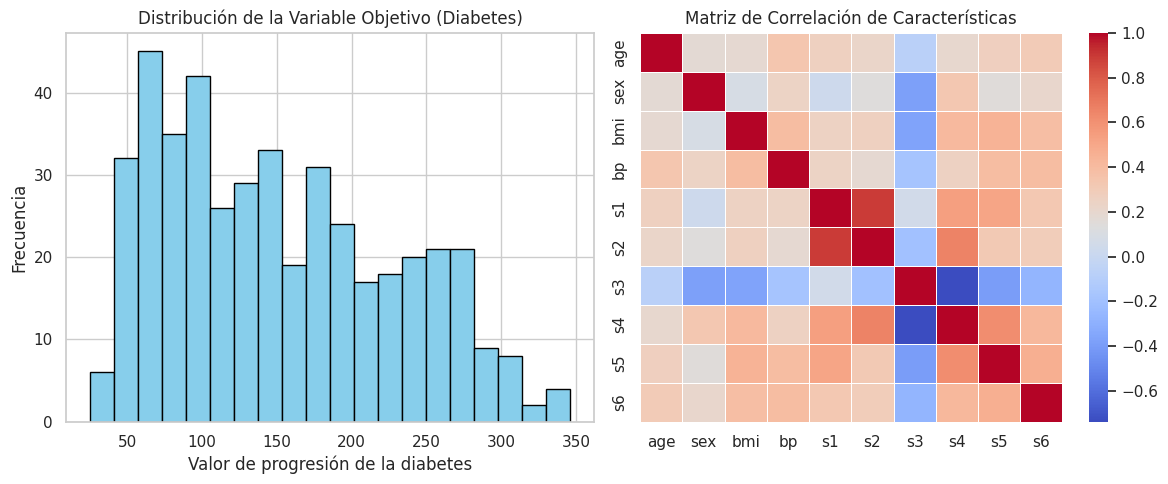

In [13]:
# Visualización para el conjunto de diabetes
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y_diabetes, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la Variable Objetivo (Diabetes)')
plt.xlabel('Valor de progresión de la diabetes')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
correlation_matrix = X_diabetes.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Características')
plt.tight_layout()
plt.show()

Histograma de la variable objetivo (regresión)

Matriz de correlación para entender relaciones entre variables

Visualización para el conjunto de cáncer

Text(0, 0.5, 'Conteo')

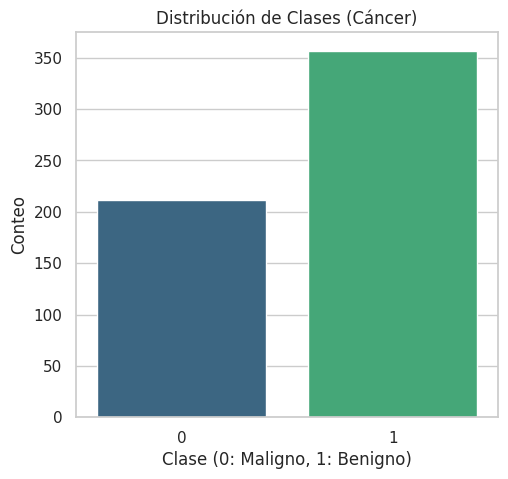

In [15]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_cancer, palette='viridis')
plt.title('Distribución de Clases (Cáncer)')
plt.xlabel('Clase (0: Maligno, 1: Benigno)')
plt.ylabel('Conteo')


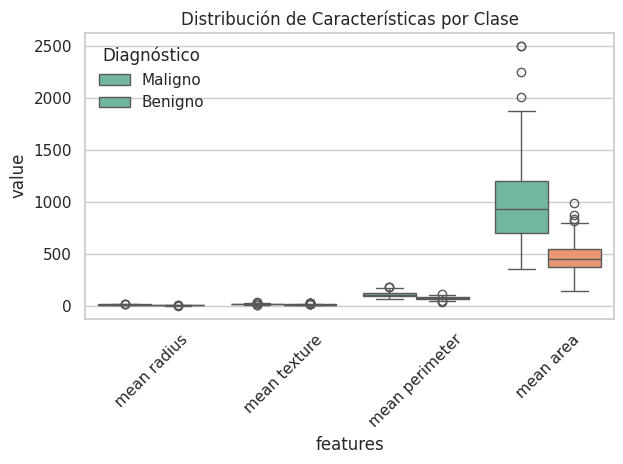

In [16]:
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
cancer_data_subset = X_cancer[features_to_plot].copy()
cancer_data_subset['diagnosis'] = y_cancer
cancer_data_melted = pd.melt(cancer_data_subset,
                            id_vars=['diagnosis'],
                            value_vars=features_to_plot,
                            var_name='features',
                            value_name='value')
sns.boxplot(x='features', y='value', hue='diagnosis', data=cancer_data_melted, palette='Set2')
plt.title('Distribución de Características por Clase')
plt.xticks(rotation=45)
plt.legend(title='Diagnóstico', labels=['Maligno', 'Benigno'])
plt.tight_layout()
plt.show()

Distribución de clases

# Pasos para la preparación de datos

1. **División de datos**: Separamos los datos en conjuntos de entrenamiento y prueba.

In [17]:
# División para el conjunto de diabetes (regresión)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42)

División para el conjunto de cáncer (clasificación)

In [18]:
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42)

In [19]:
print("Conjunto de entrenamiento de diabetes:", X_train_diabetes.shape)
print("Conjunto de prueba de diabetes:", X_test_diabetes.shape)
print("Conjunto de entrenamiento de cáncer:", X_train_cancer.shape)
print("Conjunto de prueba de cáncer:", X_test_cancer.shape)


Conjunto de entrenamiento de diabetes: (353, 10)
Conjunto de prueba de diabetes: (89, 10)
Conjunto de entrenamiento de cáncer: (455, 30)
Conjunto de prueba de cáncer: (114, 30)


2. **Preprocesamiento**: Normalizamos las características y manejamos valores faltantes.

In [20]:
# Creamos un pipeline para el preprocesamiento (usado más adelante)
preprocessor = Pipeline([
    ('scaler', StandardScaler())  # Normalizamos los datos
])

Aplicamos el preprocesamiento

In [21]:
X_train_diabetes_scaled = preprocessor.fit_transform(X_train_diabetes)
X_test_diabetes_scaled = preprocessor.transform(X_test_diabetes)

In [22]:
X_train_cancer_scaled = preprocessor.fit_transform(X_train_cancer)
X_test_cancer_scaled = preprocessor.transform(X_test_cancer)

Verificamos el resultado de la normalización (media ≈ 0, desviación estándar ≈ 1)

In [23]:
print("Media de las características normalizadas (diabetes):", np.mean(X_train_diabetes_scaled, axis=0)[:3], "...")
print("Desviación estándar (diabetes):", np.std(X_train_diabetes_scaled, axis=0)[:3], "...")

Media de las características normalizadas (diabetes): [ 2.76769479e-17  9.12081238e-17 -6.69907944e-17] ...
Desviación estándar (diabetes): [1. 1. 1.] ...


# 4. Modelos de Aprendizaje Supervisado

# 4.1 Regresión Lineal

La regresión lineal es uno de los algoritmos más simples y fundamentales en ML. Modela la relación entre una variable dependiente y una o más variables independientes ajustando una ecuación lineal a los datos observados.

In [24]:
from sklearn.linear_model import LinearRegression

Creamos y entrenamos el modelo

In [25]:
model_lr = LinearRegression()
model_lr.fit(X_train_diabetes_scaled, y_train_diabetes)

LinearRegression()

Realizamos predicciones

In [26]:
y_pred_diabetes = model_lr.predict(X_test_diabetes_scaled)

Evaluamos el modelo

In [27]:
mse = mean_squared_error(y_test_diabetes, y_pred_diabetes)
mae = mean_absolute_error(y_test_diabetes, y_pred_diabetes)
r2 = r2_score(y_test_diabetes, y_pred_diabetes)

In [28]:
print("Resultados de la Regresión Lineal:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Resultados de la Regresión Lineal:
Error cuadrático medio (MSE): 2900.19
Error absoluto medio (MAE): 42.79
R² Score: 0.4526


Visualizamos los coeficientes para entender la importancia de las características

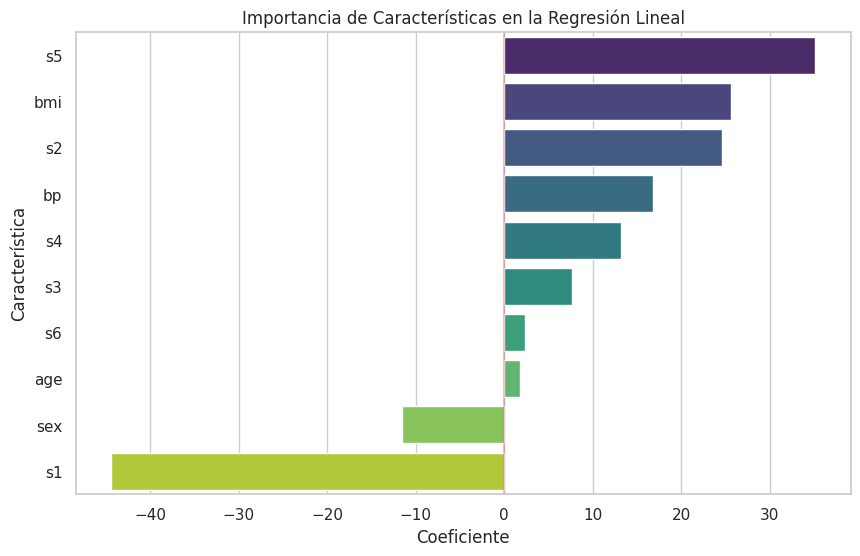

In [30]:
plt.figure(figsize=(10, 6))
coef_df = pd.DataFrame({
    'Característica': X_diabetes.columns,
    'Coeficiente': model_lr.coef_
})
coef_df = coef_df.sort_values('Coeficiente', ascending=False)

sns.barplot(x='Coeficiente', y='Característica', data=coef_df, palette='viridis')
plt.title('Importancia de Características en la Regresión Lineal')
plt.axvline(x=0, color='r', linestyle='-', alpha=0.3)
plt.show()

Visualizamos predicciones vs valores reales

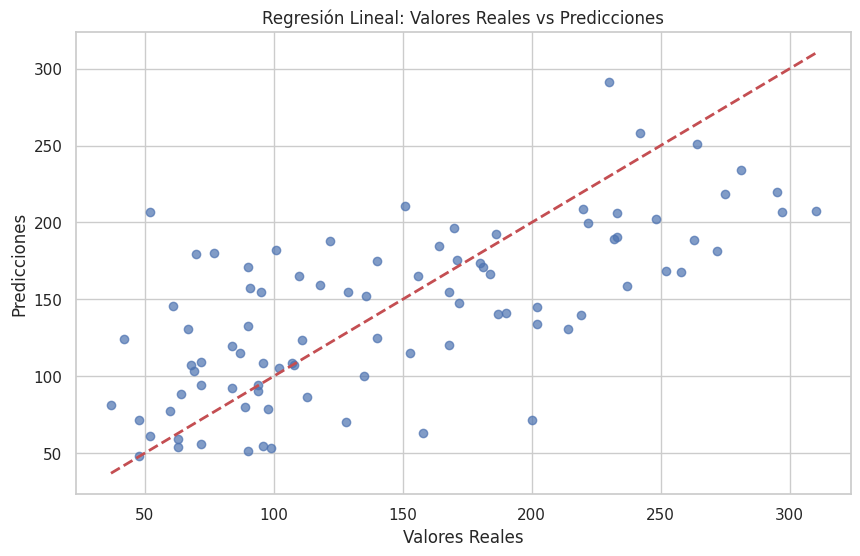

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_diabetes, y_pred_diabetes, alpha=0.7)
plt.plot([y_test_diabetes.min(), y_test_diabetes.max()],
         [y_test_diabetes.min(), y_test_diabetes.max()],
         'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Valores Reales vs Predicciones')
plt.show()

# 4.2 Árboles de Decisión

Los árboles de decisión son modelos de aprendizaje supervisado que se basan en la división recursiva de los datos según ciertos criterios para realizar predicciones.

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Creamos y entrenamos el modelo para el conjunto de cáncer

In [34]:
model_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
model_dt.fit(X_train_cancer_scaled, y_train_cancer)

DecisionTreeClassifier(max_depth=3, random_state=42)

Realizamos predicciones

In [35]:
y_pred_cancer_dt = model_dt.predict(X_test_cancer_scaled)

Evaluamos el modelo

In [36]:
accuracy = accuracy_score(y_test_cancer, y_pred_cancer_dt)
precision = precision_score(y_test_cancer, y_pred_cancer_dt)
recall = recall_score(y_test_cancer, y_pred_cancer_dt)
f1 = f1_score(y_test_cancer, y_pred_cancer_dt)

In [37]:
print("Resultados del Árbol de Decisión:")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Resultados del Árbol de Decisión:
Exactitud (Accuracy): 0.9474
Precisión: 0.9452
Sensibilidad (Recall): 0.9718
F1 Score: 0.9583


Visualizamos el árbol

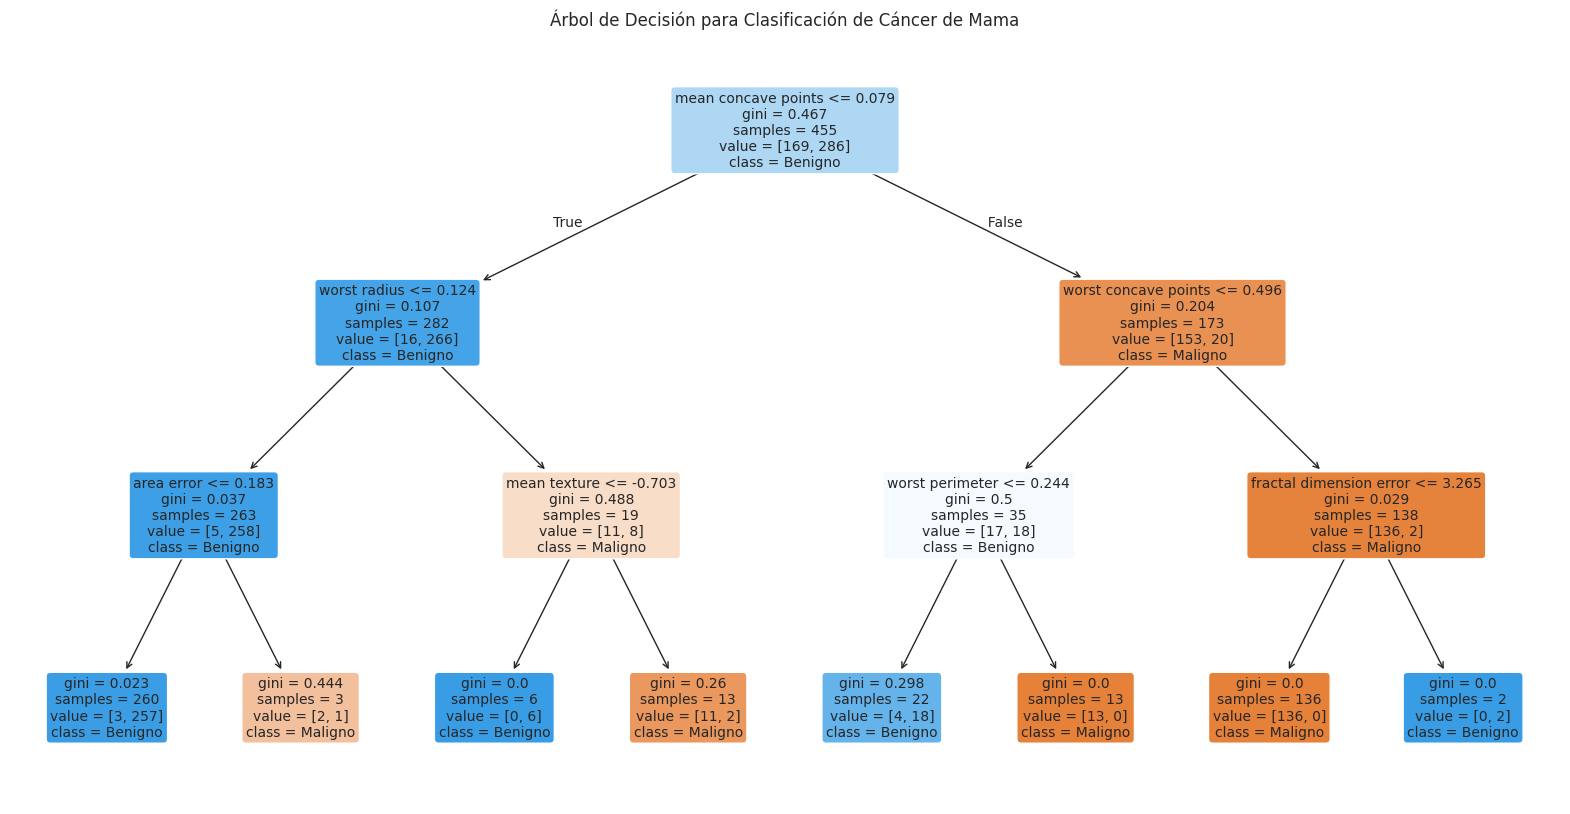

In [39]:
plt.figure(figsize=(20, 10))
plot_tree(model_dt, filled=True, feature_names=cancer_dataset.feature_names,
         class_names=['Maligno', 'Benigno'], rounded=True, fontsize=10)
plt.title('Árbol de Decisión para Clasificación de Cáncer de Mama')
plt.show()

Matriz de confusión

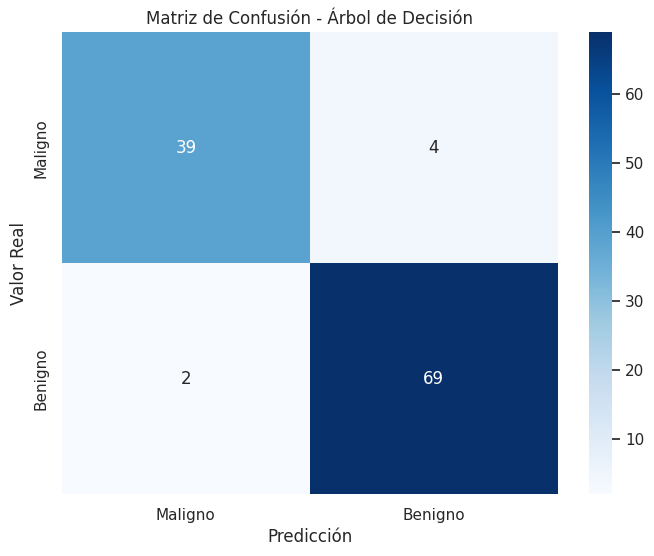

In [40]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_cancer, y_pred_cancer_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Maligno', 'Benigno'],
           yticklabels=['Maligno', 'Benigno'])
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

Importancia de características

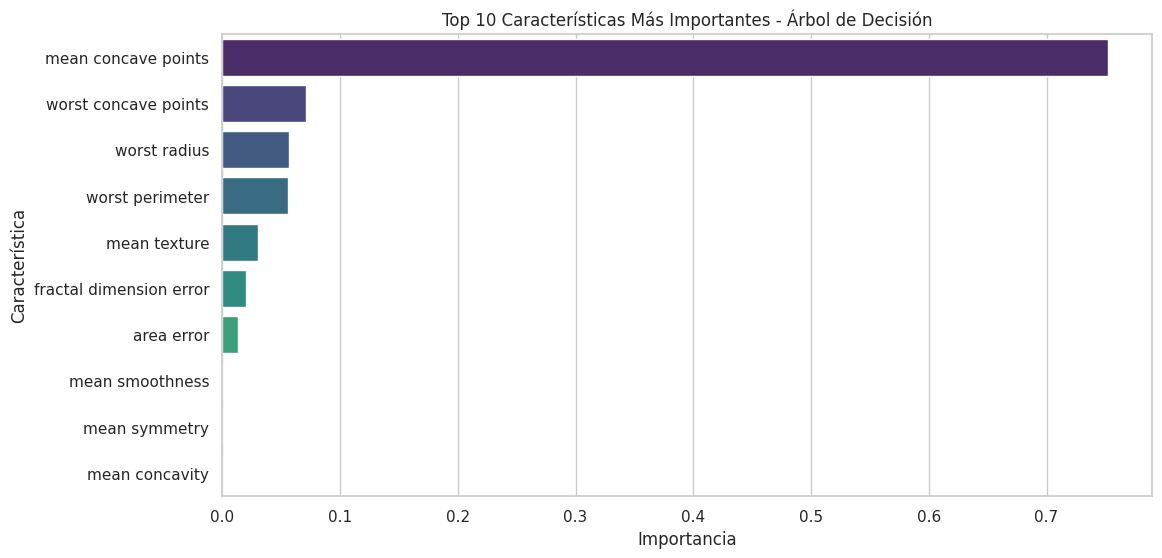

In [42]:
plt.figure(figsize=(12, 6))
feature_importances = pd.DataFrame({
    'Característica': cancer_dataset.feature_names,
    'Importancia': model_dt.feature_importances_
})
feature_importances = feature_importances.sort_values('Importancia', ascending=False).head(10)
sns.barplot(x='Importancia', y='Característica', data=feature_importances, palette='viridis')
plt.title('Top 10 Características Más Importantes - Árbol de Decisión')
plt.show()

# 4.3 Random Forest

Random Forest es un algoritmo de ensamble que construye múltiples árboles de decisión y los combina para obtener una predicción más precisa y robusta.

In [43]:

from sklearn.ensemble import RandomForestClassifier

Creamos y entrenamos el modelo

In [44]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_cancer_scaled, y_train_cancer)

RandomForestClassifier(random_state=42)

Realizamos predicciones

In [45]:
y_pred_cancer_rf = model_rf.predict(X_test_cancer_scaled)
y_pred_proba_rf = model_rf.predict_proba(X_test_cancer_scaled)[:, 1]

Evaluamos el modelo

In [46]:
accuracy_rf = accuracy_score(y_test_cancer, y_pred_cancer_rf)
precision_rf = precision_score(y_test_cancer, y_pred_cancer_rf)
recall_rf = recall_score(y_test_cancer, y_pred_cancer_rf)
f1_rf = f1_score(y_test_cancer, y_pred_cancer_rf)

In [47]:
print("Resultados del Random Forest:")
print(f"Exactitud (Accuracy): {accuracy_rf:.4f}")
print(f"Precisión: {precision_rf:.4f}")
print(f"Sensibilidad (Recall): {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

Resultados del Random Forest:
Exactitud (Accuracy): 0.9649
Precisión: 0.9589
Sensibilidad (Recall): 0.9859
F1 Score: 0.9722


Comparación con el árbol de decisión anterior

In [48]:
print("\nComparación con el Árbol de Decisión:")
print(f"Mejora en Exactitud: {(accuracy_rf - accuracy)*100:.2f}%")
print(f"Mejora en F1 Score: {(f1_rf - f1)*100:.2f}%")


Comparación con el Árbol de Decisión:
Mejora en Exactitud: 1.75%
Mejora en F1 Score: 1.39%


Curva ROC

In [49]:
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test_cancer, y_pred_proba_rf)
auc = roc_auc_score(y_test_cancer, y_pred_proba_rf)

<Figure size 800x600 with 0 Axes>

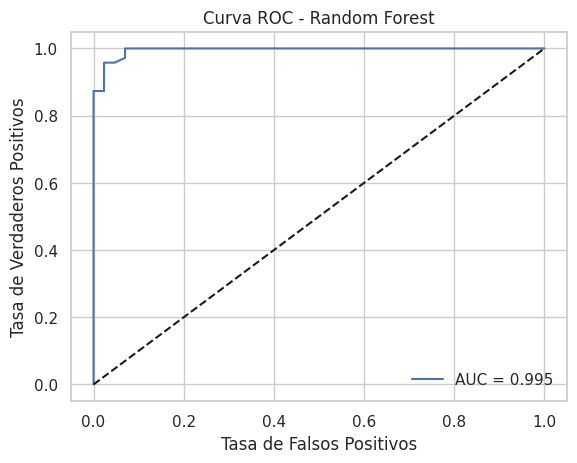

In [50]:
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.show()

Importancia de características

In [51]:
plt.figure(figsize=(12, 6))
feature_importances_rf = pd.DataFrame({
    'Característica': cancer_dataset.feature_names,
    'Importancia': model_rf.feature_importances_
})
feature_importances_rf = feature_importances_rf.sort_values('Importancia', ascending=False).head(10)

<Figure size 1200x600 with 0 Axes>

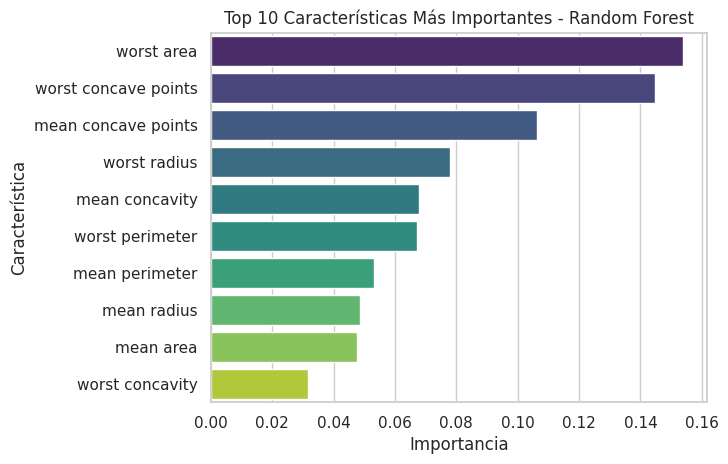

In [52]:
sns.barplot(x='Importancia', y='Característica', data=feature_importances_rf, palette='viridis')
plt.title('Top 10 Características Más Importantes - Random Forest')
plt.show()

# 5. Evaluación de Modelos

La evaluación correcta de los modelos es crucial para entender su rendimiento real y su capacidad de generalización.

In [53]:

# Para modelos de clasificación
from sklearn.model_selection import cross_val_score, KFold

Realizamos validación cruzada

In [54]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

Para el modelo de árbol de decisión

In [55]:
cv_scores_dt = cross_val_score(model_dt, X_cancer, y_cancer, cv=cv, scoring='accuracy')

Para el modelo de random forest

In [56]:
cv_scores_rf = cross_val_score(model_rf, X_cancer, y_cancer, cv=cv, scoring='accuracy')

In [57]:
print("Validación Cruzada (5-fold):")
print(f"Árbol de Decisión - Exactitud media: {cv_scores_dt.mean():.4f}, Desviación estándar: {cv_scores_dt.std():.4f}")
print(f"Random Forest - Exactitud media: {cv_scores_rf.mean():.4f}, Desviación estándar: {cv_scores_rf.std():.4f}")

Validación Cruzada (5-fold):
Árbol de Decisión - Exactitud media: 0.9350, Desviación estándar: 0.0162
Random Forest - Exactitud media: 0.9578, Desviación estándar: 0.0102


Graficamos los resultados de la validación cruzada

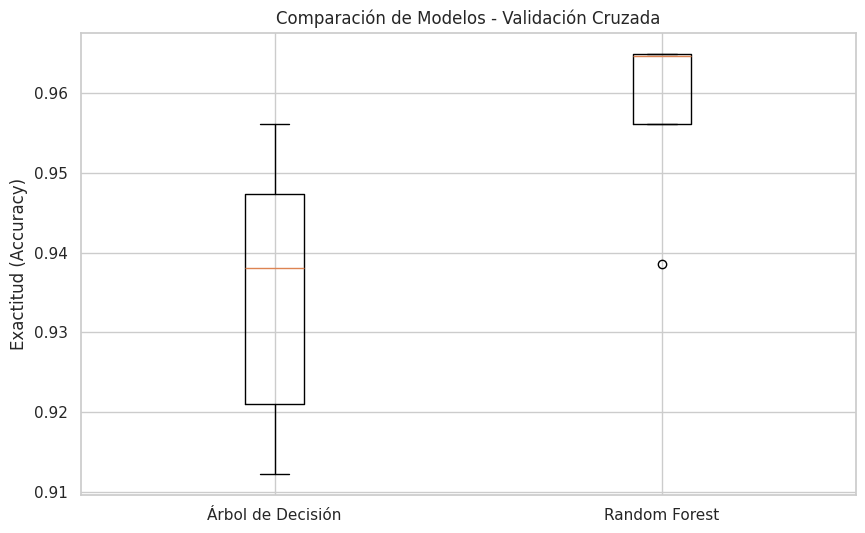

In [58]:
plt.figure(figsize=(10, 6))
plt.boxplot([cv_scores_dt, cv_scores_rf], labels=['Árbol de Decisión', 'Random Forest'])
plt.title('Comparación de Modelos - Validación Cruzada')
plt.ylabel('Exactitud (Accuracy)')
plt.show()

# 6. Aprendizaje No Supervisado

# 6.1 K-Means

K-Means es un algoritmo de clustering que divide los datos en K grupos basándose en la similitud entre las observaciones.

In [59]:

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Usaremos el conjunto de cáncer para clustering<br>
Aplicamos PCA para visualizar en 2D

In [60]:
pca = PCA(n_components=2)
X_cancer_pca = pca.fit_transform(X_cancer)

Creamos y entrenamos el modelo K-Means

In [61]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_cancer)

Visualizamos los clusters

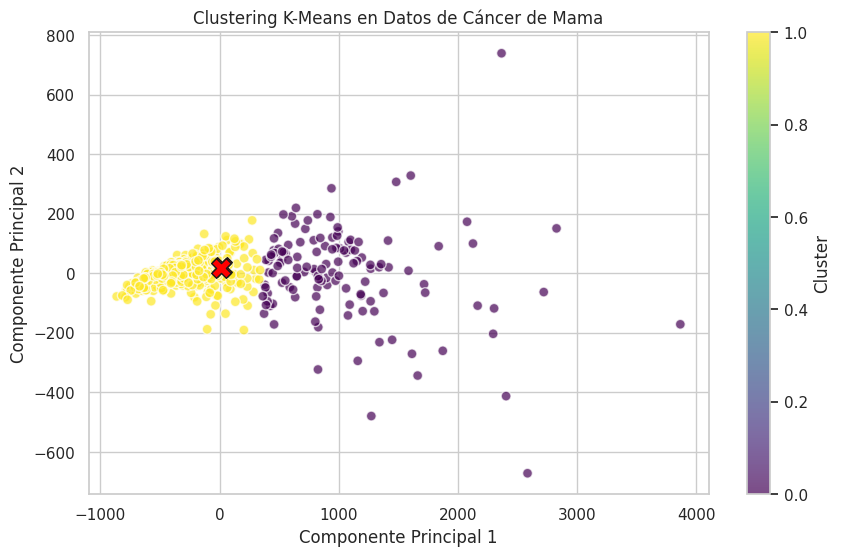

In [62]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_cancer_pca[:, 0], X_cancer_pca[:, 1], c=clusters, cmap='viridis',
                     alpha=0.7, s=50, edgecolors='w')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red',
           marker='X', s=200, edgecolors='k')
plt.title('Clustering K-Means en Datos de Cáncer de Mama')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

Comparamos los clusters con las etiquetas reales

In [63]:
from sklearn.metrics import adjusted_rand_score

Calculamos la concordancia entre clusters y etiquetas reales

In [64]:
ari = adjusted_rand_score(y_cancer, clusters)
print(f"Índice de Rand Ajustado: {ari:.4f}")

Índice de Rand Ajustado: 0.4914


Visualizamos los clusters vs las etiquetas reales

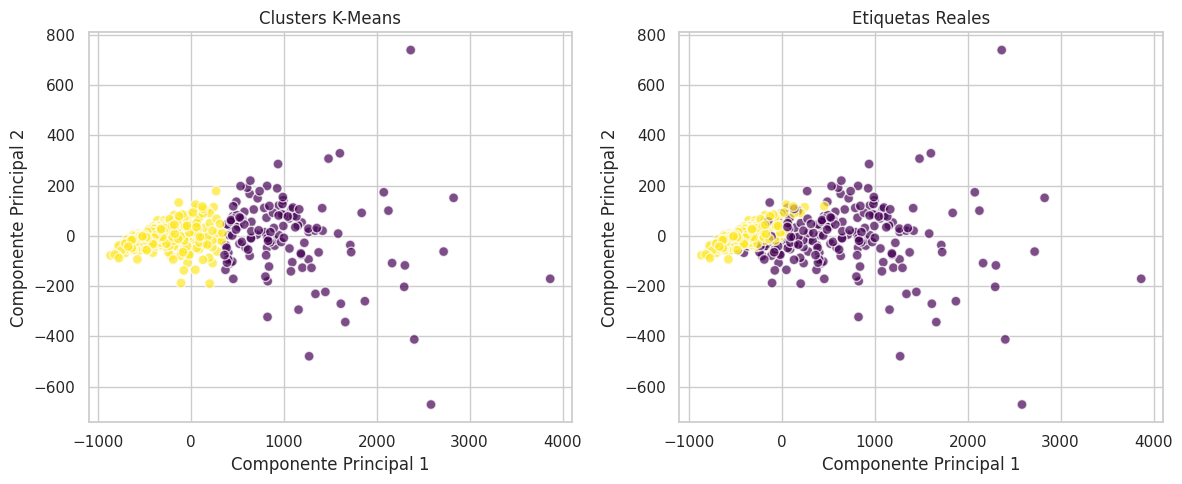

In [67]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_cancer_pca[:, 0], X_cancer_pca[:, 1], c=clusters, cmap='viridis',
           alpha=0.7, s=50, edgecolors='w')
plt.title('Clusters K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.subplot(1, 2, 2)
plt.scatter(X_cancer_pca[:, 0], X_cancer_pca[:, 1], c=y_cancer, cmap='viridis',
           alpha=0.7, s=50, edgecolors='w')
plt.title('Etiquetas Reales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.tight_layout()
plt.show()

# 7. Redes Neuronales con GPU

Las redes neuronales son modelos muy potentes que pueden aprender representaciones complejas. Vamos a usar TensorFlow con GPU para entrenar una red neuronal simple:

In [ ]:
%pip install tensorflow
# Verificamos la disponibilidad de GPU

In [68]:
import tensorflow as tf

In [69]:
print("TensorFlow version:", tf.__version__)
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.18.0
GPU disponible: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Esto lo hacemos si estamos con nuestra computadora local. En google colab podemos ir al logo donde dice RAM y Disco, poner "Cambiar tipo de entorno de ejecución" y colocar GPU. Ojo que se reinicia todo, cargamos de nuevo tensorflow

In [70]:
import tensorflow as tf

En caso de que no haya GPU, seguiremos con CPU

In [71]:
print("Dispositivo usado:", tf.config.list_physical_devices())

Dispositivo usado: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Preparamos los datos para TensorFlow

In [72]:
from sklearn.preprocessing import StandardScaler

Normalizamos los datos para el conjunto MNIST

In [73]:
from tensorflow.keras.datasets import mnist

In [74]:
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preprocesamiento

In [75]:
X_train_mnist = X_train_mnist.reshape(-1, 28*28).astype('float32') / 255.0
X_test_mnist = X_test_mnist.reshape(-1, 28*28).astype('float32') / 255.0

One-hot encoding para las etiquetas

In [76]:
y_train_mnist_onehot = tf.keras.utils.to_categorical(y_train_mnist, 10)
y_test_mnist_onehot = tf.keras.utils.to_categorical(y_test_mnist, 10)

Definimos un modelo sencillo

In [77]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

Compilamos el modelo

In [78]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Mostramos un resumen del modelo

In [79]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Entrenamos el modelo (con una muestra pequeña para que sea rápido)

In [80]:
history = model.fit(X_train_mnist[:10000], y_train_mnist_onehot[:10000],
                   epochs=5,
                   batch_size=128,
                   validation_split=0.2,
                   verbose=1)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.4666 - loss: 1.6344 - val_accuracy: 0.8720 - val_loss: 0.4708
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8482 - loss: 0.4984 - val_accuracy: 0.8980 - val_loss: 0.3521
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8927 - loss: 0.3855 - val_accuracy: 0.9085 - val_loss: 0.3176
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9126 - loss: 0.2996 - val_accuracy: 0.9215 - val_loss: 0.2754
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9172 - loss: 0.2738 - val_accuracy: 0.9235 - val_loss: 0.2677


Evaluamos el modelo

In [81]:
test_loss, test_acc = model.evaluate(X_test_mnist, y_test_mnist_onehot)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9160 - loss: 0.2732
Precisión en el conjunto de prueba: 0.9287


In [82]:
# Tenemos que recargar todo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Visualizamos el progreso del entrenamiento

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

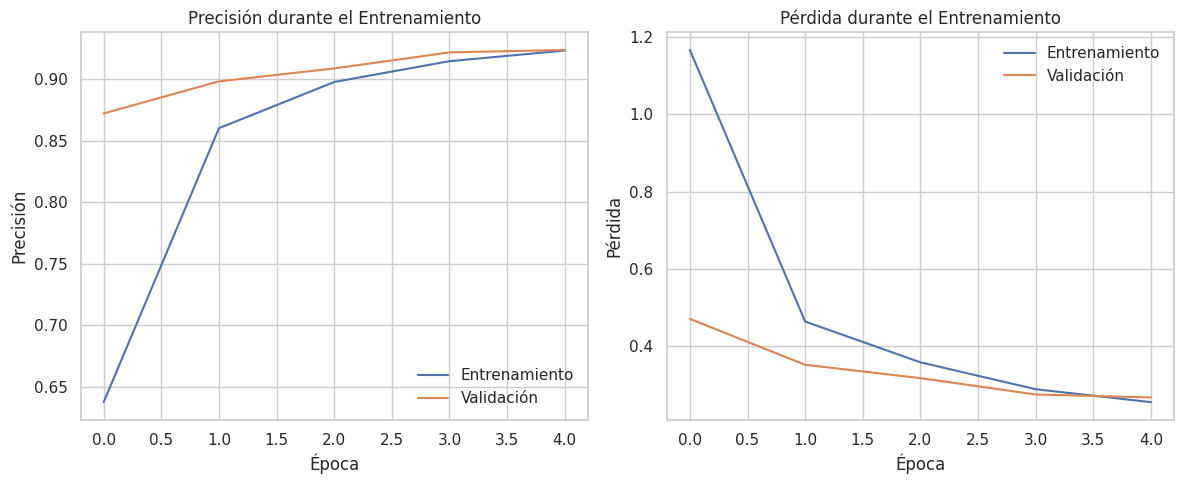

In [83]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.tight_layout()
plt.show()

Realizamos algunas predicciones

In [84]:
import random

Tomamos algunas imágenes al azar

In [85]:
num_samples = 5
sample_indices = random.sample(range(len(X_test_mnist)), num_samples)

Hacemos predicciones

In [86]:
sample_images = X_test_mnist[sample_indices]
sample_labels = y_test_mnist[sample_indices]
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


Visualizamos las imágenes y sus predicciones

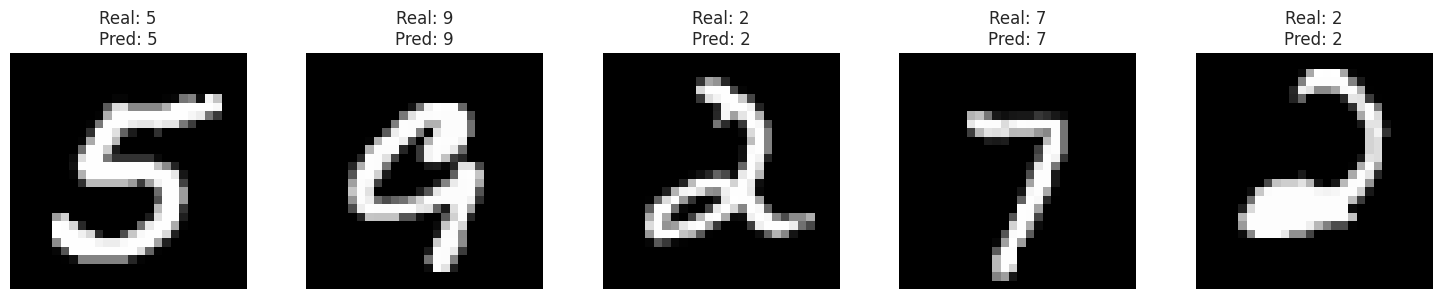

In [87]:
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(X_test_mnist[sample_indices[i]].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {sample_labels[i]}\nPred: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 8. Resumen y Recursos Adicionales

Los modelos de Machine Learning son herramientas poderosas para extraer patrones y realizar predicciones a partir de datos. En esta clase hemos visto:

1. **Fundamentos del Machine Learning**: Tipos de aprendizaje y conceptos básicos.
2. **Preparación de datos**: Pasos cruciales antes de entrenar modelos.
3. **Modelos Supervisados**:
   - Regresión Lineal para predecir valores continuos.
   - Árboles de Decisión para clasificación.
   - Random Forest como modelo de ensamble.
4. **Modelos No Supervisados**:
   - K-Means para clustering.
5. **Redes Neuronales**: Implementación básica con TensorFlow utilizando GPU.
6. **Sesgos en Machine Learning**: Identificación y mitigación.

# Recursos Adicionales

- **Libros**:
  - "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" por Aurélien Géron
  - "Pattern Recognition and Machine Learning" por Christopher Bishop
  - "Deep Learning" por Ian Goodfellow, Yoshua Bengio y Aaron Courville

- **Cursos en línea**:
  - Cursos de Machine Learning en Coursera, edX, y Udacity
  - Fast.ai para aprendizaje profundo práctico
  - DataCamp para ciencia de datos y ML

- **Comunidades**:
  - Kaggle para competencias y datasets
  - GitHub para proyectos de código abierto
  - Stack Overflow para resolver dudas específicas

# Ejercicios Prácticos (para casa)

1. Intentar mejorar el modelo de Random Forest ajustando hiperparámetros.
2. Aplicar PCA a todo el conjunto de datos y visualizar el resultado.
3. Implementar una red neuronal más compleja y entrenarla por más épocas.
4. Probar diferentes técnicas para mitigar el sesgo en el ejemplo presentado.
5. Explorar el conjunto de datos MNIST y crear un clasificador que logre más del 95% de precisión.